In [1]:
%config Completer.use_jedi = False

In [1]:
import sklearn
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import pprint
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import ParameterGrid

In [2]:
df = pd.read_csv('df_for_RF.csv')
#df = pd.read_csv('df_1_outlier.csv')
#df = pd.read_csv('df_eng.csv')
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.head()

,Subject_ID,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,zfALFF_rTtha_L,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,-0.764751,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,-0.347692,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,-0.512793,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,-0.425914,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,1,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,-0.641054,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


### define dependent and independent variables(adverserial validation)

In [4]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# split data into X and y
#X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:], data['diagadhd'], test_size=0.3)
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 9)
X_train = training_set.iloc[:,2:].values
y_train = training_set.iloc[:,1].values
X_test = test_set.iloc[:,2:].values
y_test = test_set.iloc[:,1].values

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/tara/Programming/env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:27:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 83.33%


### apply SVM with grid search

In [5]:
#other kernels: 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', random_state = 1)
classifier.fit(X_train,y_train)

SVC(kernel='poly', random_state=1)

In [7]:
Y_pred = classifier.predict(X_test)

In [8]:
test_set["Predictions"] = Y_pred

<ipython-input-8-946a65001e17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Predictions"] = Y_pred


In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.75


### visualize the classifier ???

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(y_train)

In [49]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(random_state=1)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
    plt.title('Apples Vs Oranges')
    plt.xlabel('Weight In Grams')
    plt.ylabel('Size in cm')
    plt.legend()
    plt.show()

ValueError: X.shape[1] = 2 should be equal to 184, the number of features at training time

<Figure size 504x504 with 0 Axes>

## Evaluation

In [20]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[14  2]
 [ 2  6]]


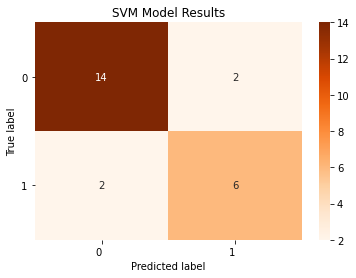

In [12]:
import seaborn as sns

heatmap = sns.heatmap(confusion, annot=True, cmap='Oranges')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
                            rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
                            rotation=0, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('SVM Model Results')
plt.show()

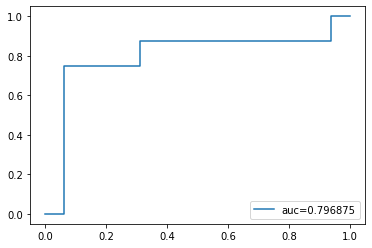

In [13]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [14]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [15]:
# Let's see the sensitivity of our logistic regression model

print('the sensitivity if this model is: ', TP / float(TP+FN))

the sensitivity if this model is:  0.75


In [16]:
# Let us calculate specificity

print('the specificity if this model is: ', TN / float(TN+FP))

the specificity if this model is:  0.875


In [18]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
y_score1 = model.predict_proba(X_test)[:,1]
y_score2 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.796875
